In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import itertools 
import shap
import matplotlib.pyplot as plt

This notebook applies machine learning to classify breast cancer data. The data has 2 labels namely malignant and benign.

In [2]:
def read_data(filename):
    df_raw = pd.read_csv(filename)
    return df_raw

Replace label M (malignant) with 1, and B (benign with 0).

In [3]:
def engineer_data(df_raw):
    df_raw['label'] = df_raw['class_label'].apply(lambda x : 1 if x == 'M' else 0)
    df_raw.drop('class_label', axis=1, inplace=True)
    return df_raw

In [4]:
df = read_data('breast_cancer_data.csv')

In [5]:
df = engineer_data(df)
pd.set_option('display.max_columns', None)  # Show all columns
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Shows the correlation of different features to the label. This matches what the SHAP plot shows.

In [6]:
def print_correlation_to_label(df):
    corr_matrix = df.corr(method='pearson')
    print(f"{corr_matrix['label'].sort_values(ascending=False)}")

In [7]:
print_correlation_to_label(df)

label                 1.000000
concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
symmetry2            -0.006522
texture2             -0.008303
fractal_dimension1   -0.012838
smoothness2          -0.067016
Name: label, dtype: float64


Count the number of rows that have zero value for the given feature. In this case, it's only 13% for a few columns, so we don't do anything. Otherwise, we might consider imputing it with mean value.

In [8]:
def find_zero_entries(df):
    total_rows = len(df)
    column_names = list(df.columns.values)
    
    for column_name in column_names:
        if column_name != 'label':
            percentage_zero_rows = len(df[df[column_name] == 0] / total_rows * 100.0)
            
            if (percentage_zero_rows > 0):
                print(f"Column : {column_name} : Num. zero values : {percentage_zero_rows} %")

In [9]:
find_zero_entries(df)

Column : concavity1 : Num. zero values : 13 %
Column : concave_points1 : Num. zero values : 13 %
Column : concavity2 : Num. zero values : 13 %
Column : concave_points2 : Num. zero values : 13 %
Column : concavity3 : Num. zero values : 13 %
Column : concave_points3 : Num. zero values : 13 %


In [10]:
def count_malignant_benign(y):
    """
    Returns the percentage of malignant and benign samples in the given series.
    """
    total = len(y)
    num_malignant = sum(y)
    num_benign = total - num_malignant
    return num_malignant * 100 / total, num_benign * 100 / total

In [11]:
def split_data_training_test(df):
    """
    Splits the given data frame in training, validation and test data sets. The size of test set is 10%.
    The dev set is spliit again into training and validation sets. Validation dataset is 10% of the dev set.
    """
    
    X = df.drop('label', axis=1)
    y = df['label']
    X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
    
    print(f"Total samples : {len(df)}")
    print(f"Num samples in test set : {len(X_test)}")
        
    num_malignant, num_benign = count_malignant_benign(y_test)
    print(f"Test set - malignant : {num_malignant:.3f} %, benign : {num_benign:.3f} %")
    
    X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.10, random_state=10)
    
    num_malignant, num_benign = count_malignant_benign(y_train)
    print(f"Num samples in train set : {len(X_train)}")
    print(f"Train set - malignant : {num_malignant:.3f} %, benign : {num_benign:.3f} %")
    
    num_malignant, num_benign = count_malignant_benign(y_val)
    print(f"Num samples in validation set : {len(X_val)}")
    print(f"Validation set - malignant : {num_malignant:.3f} %, benign : {num_benign:.3f} %")
    
    return X_train, y_train, X_val, y_val, X_test, y_test 

In [12]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data_training_test(df)

Total samples : 569
Num samples in test set : 57
Test set - malignant : 36.842 %, benign : 63.158 %
Num samples in train set : 460
Train set - malignant : 37.391 %, benign : 62.609 %
Num samples in validation set : 52
Validation set - malignant : 36.538 %, benign : 63.462 %


In [17]:
def holdout_grid_search(clf, Xtrain, ytrain, Xtest, ytest, hyperparams, fixed_hyperparams={}):
    """
    Performs grid search on the validation dataset to find the best hyperparameters.
    """
    best_estimator = None 
    best_hyperparams = {}
    
    best_score = 0.0
    
    # get list of param values
    lists = hyperparams.values()
    # get all param combinations names to values in best_estimator
    param_combinations = list(itertools.product(*lists))
    total_param_combinations = len(param_combinations)
    
    # iterate through param combinations
    for i, params in enumerate(param_combinations, 1):
        # fill param dict with params
        param_dict = {}
        for param_index, param_name in enumerate(hyperparams):
            param_dict[param_name] = params[param_index]
        
        # create estimator with specified params
        estimator = clf(**param_dict, **fixed_hyperparams)
    
        # fit estimator
        estimator.fit(Xtrain, ytrain)
        # get predictions on the test
        y_preds = estimator.predict(Xtest)
        f1score = f1_score(ytest, y_preds)
     
        #print(f'[{i}/{total_param_combinations}] {param_dict}')
        #print(f'Val f1-score: {f1score}\n')
    
        if f1score >= best_score:
            best_score = f1score
            best_estimator = estimator
            best_hyperparams = param_dict
            
    best_hyperparams.update(fixed_hyperparams)
    
    return best_estimator, best_hyperparams


In [18]:
def random_forest_grid_search(Xtrain, ytrain, Xval, yval):
    hyperparams = {
        'n_estimators': [50, 75, 100, 120, 150],
        'max_depth': [3,4,5, 6, 7,8, 9, 10],
        'min_samples_leaf': [5,6,7,8,9,10]
    }
    fixed_hyperparams = {
       'random_state': 10,
    }
    
    rf = RandomForestClassifier
    
    best_rf, best_hyperparams = holdout_grid_search(rf, Xtrain, ytrain, Xval, yval, hyperparams, fixed_hyperparams)
    
    print(f"Best hyperparameters:\n{best_hyperparams}")
    
    y_train_best_pred = best_rf.predict(Xtrain)
    print("Train f1 score : " + str(f1_score(ytrain, y_train_best_pred)))
    
    y_val_best_pred = best_rf.predict(Xval)
    print("Validation f1 score : " + str(f1_score(yval, y_val_best_pred)))

    return best_rf

Trains a random forest model.

In [19]:
def train_model(X_train, y_train, X_val, y_val, X_test, y_test):
    best_rf = random_forest_grid_search(X_train, y_train, X_val, y_val)
    y_pred = best_rf.predict(X_test)
    print()
    print(f"F-score against test set : {f1_score(y_test, y_pred)}")
    return best_rf

In [20]:
best_model = train_model(X_train, y_train, X_val, y_val, X_test, y_test)

Best hyperparameters:
{'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 5, 'random_state': 10}
Train f1 score : 0.9736070381231672
Validation f1 score : 1.0

F-score against test set : 0.9767441860465117


In [21]:
def explain_model(classifier, X_importance):
    """
    Generates SHAP plots for the given classifier.
    """
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_importance)[1]
    shap.summary_plot(shap_values, X_importance)

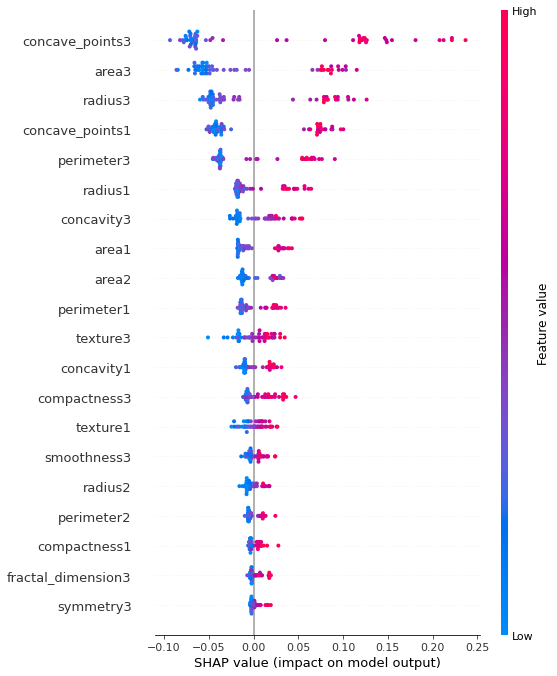

In [22]:
explain_model(best_model, X_test)

Note that the order of importance of the features matches the correlation described earlier in the analysis.